<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


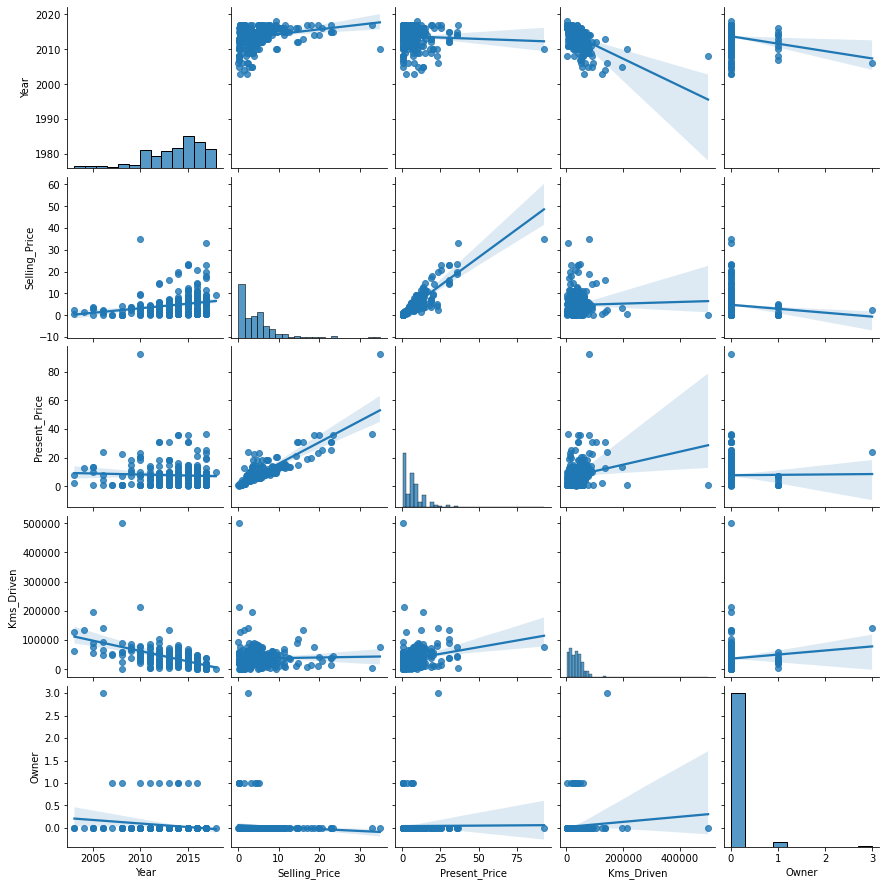

In [6]:
sns.pairplot(df, kind="reg")

# Data Preparation

In [6]:
df = pd.get_dummies(df, prefix=["Car_Name","Fuel_Type","Seller_Type", "Transmission"], prefix_sep="_", drop_first=True)

df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,...,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,

In [7]:
# multicollinearity durumuna baktım.

def color_red(val):   
    
    if (val > 0.90 and val < 0.99) :  
        color = 'red'
        
    elif (val < -0.90 and val >-0.99) :
          color ="blue"
    else:
        color = 'white'
          
    return f'color: {color}'

In [9]:
pd.DataFrame(df).corr().style.applymap(color_red)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [8]:
X = df.drop(columns ="Selling_Price") # burada target column düşürdüm ve bağımsız değişkenleri belirledim.
y = df["Selling_Price"]

### Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [11]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 105)
Train target shape   :  (210,)
Test features shape  :  (91, 105)
Test target shape    :  (91,)


##  Model Building (Linear Regression)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train) 

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred

array([ 8.04102616e+00,  9.88634349e+00,  5.63738064e+00, -4.93185212e-01,
        8.71969707e+00,  6.71553664e+00,  1.65203829e+00,  7.31124875e+00,
        8.52817908e-01,  6.83616526e+00,  1.64351188e+01,  5.78145361e-01,
        8.28907504e+00,  9.00175845e+00,  6.45074951e+00,  2.28113213e+00,
        2.94350054e+00,  1.13022021e+01,  8.44153721e+00,  9.41928204e+00,
        6.66798543e+00,  8.03925761e+00,  6.30266927e+00,  2.35364769e+00,
        6.97177655e+00,  3.63628112e+00,  5.10287719e+00,  1.89946086e+00,
        2.91822506e+00,  2.79181268e+00,  7.31453613e-02,  8.97825770e+00,
       -1.91407154e+00,  2.09000754e+00,  8.31794603e+00,  4.12786360e+00,
        5.47992550e+00,  6.37964140e+00,  3.39504967e+00,  7.07689412e+00,
        5.63671814e+00,  7.88813710e+00,  4.13525736e+00, -2.40785983e-01,
        1.35559603e+01, -7.13011671e-03,  8.28013313e+00,  9.45634159e+00,
        3.77629938e+00,  4.22096198e+00,  6.06945549e+00,  3.08407850e+00,
        2.35885366e+01,  

In [16]:
model.coef_

array([ 4.52817908e-01,  6.28656546e-01, -2.40367304e-05, -1.13822464e-01,
        7.22443361e+00,  1.80828685e-11,  4.26543245e-11, -7.44062877e+00,
       -7.27815127e+00, -7.84796026e+00, -7.00135673e+00, -5.16221329e+00,
       -6.01820416e+00, -5.48828252e+00, -7.83578495e+00,  3.01199066e-11,
       -6.62336181e+00, -3.88105504e+00, -5.74417687e+00, -5.75377731e+00,
       -7.46105853e+00, -7.14903692e-11, -6.01542968e+00, -6.53452657e+00,
       -6.17318000e+00, -5.11057863e-11, -4.62310003e+00, -2.76046963e+00,
       -7.45777138e+00, -6.95658310e+00,  5.75965942e-11, -7.00610305e+00,
       -1.71127771e+00, -2.49968934e-11, -8.46825377e+00, -7.75574872e+00,
       -2.75127356e+00,  1.81821225e-11, -6.54795766e+00, -5.15270116e+00,
       -6.48984952e+00,  1.15638610e-11, -2.77508878e+00, -7.25876140e+00,
       -7.14084343e+00, -7.65619460e+00, -7.02146170e+00, -4.69366768e-11,
       -7.39726842e+00, -6.05027458e+00, -3.92491503e+00, -5.57447163e+00,
       -7.19468692e+00, -

In [18]:
model.intercept_ 

-905.6010810539159

In [17]:
sum(X_test.loc[177] * model.coef_) + model.intercept_  # 177 indeksteki featureların target değerini bulduk.

8.041026156563134

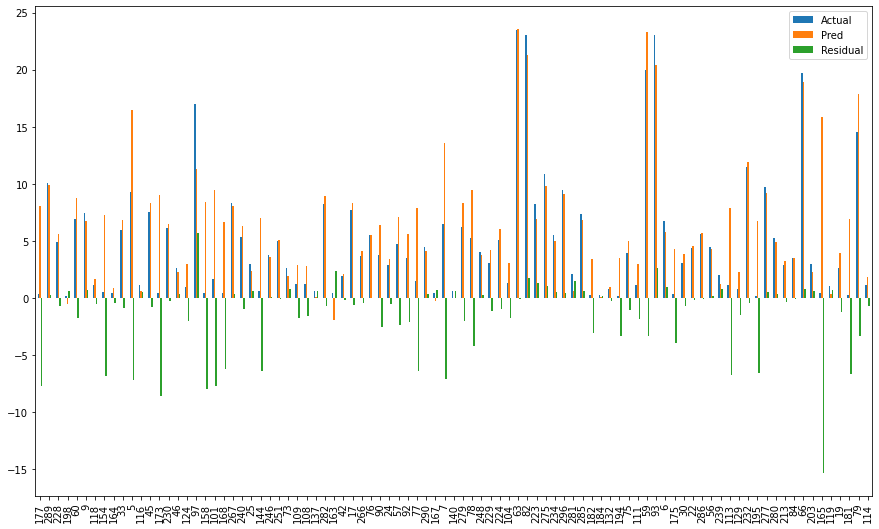

In [18]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing.plot(kind ="bar", figsize=(15,9))
plt.show()

Text(0, 0.5, 'residuals')

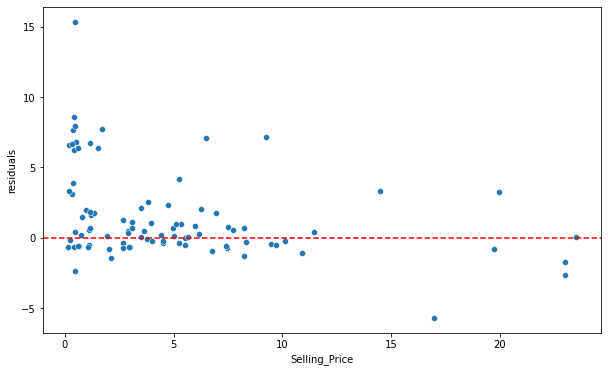

In [19]:
residuals = y_test-y_pred  # residual dağılımına baktım.

sns.scatterplot( x = y_test, y = -residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("residuals")           

In [ ]:
Residuals ların dağılımının normal bir dağılım göstermediğini görüyoruz.

# Interpret the model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [22]:
eval_metric(y_test, y_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.5819810812600233
MAE 		: 2.1291509581957886
MSE 		: 11.902754538286388
RMSE 		: 3.4500368894095015


In [23]:
y_train_pred = model.predict(X_train)  

In [24]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9541180210314137
MAE 		: 0.5809150725302563
MSE 		: 1.1260647171089295
RMSE 		: 1.0611619655401006


# Model Evaluation

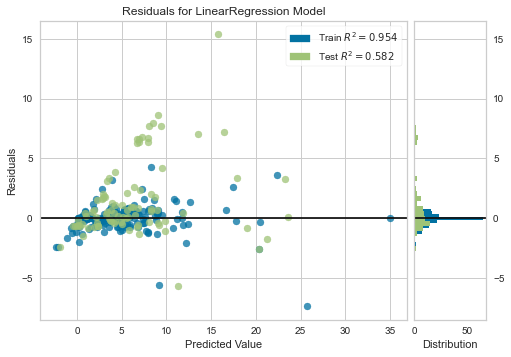

In [25]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();  

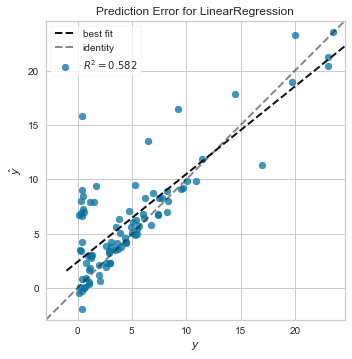

In [26]:
from yellowbrick.regressor import PredictionError  

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [46]:
df.shape

(301, 106)

In [27]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  #yeni bir feature eklenince onunla ilgili yeni veri girmemiz gerekir.
    return adj_r2

In [28]:
adj_r2(y_test, y_pred, df)

0.3568939711692667

### Linear Reg with CV

In [36]:
from sklearn.model_selection import cross_validate, cross_val_score

In [37]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [38]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [39]:
pd.DataFrame(scores, index = range(1,6)) 

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.016549,0.003473,0.438546,-2.228729,-23.024278,-4.798362
2,0.003987,0.002990,-0.297897,-3.404492,-24.439948,-4.943678
3,0.003856,0.002990,-0.162960,-2.288255,-13.978220,-3.738746
4,0.006693,0.002990,0.704198,-1.808669,-9.622025,-3.101939
5,0.004586,0.002482,0.388612,-2.111921,-10.852047,-3.294245


In [40]:
scores = pd.DataFrame(scores, index=range(1,6))  # CV sonucu oluşan ortalama score lara baktım.
scores.iloc[:, 2:].mean()

test_r2                              0.214100
test_neg_mean_absolute_error        -2.368413
test_neg_mean_squared_error        -16.383303
test_neg_root_mean_squared_error    -3.975394
dtype: float64

In [41]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls 

,linear_train,linear_test
R2,0.954118,0.581981
mae,0.580915,2.129151
mse,1.126065,11.902755
rmse,1.061162,3.450037


# Regularization

# Ridge

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 

In [30]:
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[0.35714286, 0.00119397, 0.0028028 , ..., 1.        , 1.        ,
        0.        ],
       [0.71428571, 0.19689569, 0.11111311, ..., 1.        , 0.        ,
        1.        ],
       [0.92857143, 0.11201563, 0.08508509, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.78571429, 0.0323456 , 0.03203203, ..., 1.        , 1.        ,
        1.        ],
       [0.57142857, 0.10344079, 0.13781982, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.01421904, 0.00700701, ..., 1.        , 1.        ,
        1.        ]])

In [31]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled

array([[9.28571429e-01, 1.08542277e-03, 4.70470470e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.28571429e-01, 1.42516010e-01, 2.09809810e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.42857143e-01, 9.69282536e-02, 1.19119119e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.28571429e-01, 1.08542277e-04, 9.90990991e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.42857143e-01, 3.27146424e-01, 1.77177177e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.57142857e-01, 1.08542277e-02, 3.30330330e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [32]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=1, random_state=42)

In [35]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [43]:
y_pred = ridge_model.predict(X_test_scaled)  
y_train_pred = ridge_model.predict(X_train_scaled)

In [44]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.891483,0.867692
mae,0.951722,1.307916
mse,2.663285,3.767378
rmse,1.631957,1.940974


In [45]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.954118,0.581981,0.891483,0.867692
mae,0.580915,2.129151,0.951722,1.307916
mse,1.126065,11.902755,2.663285,3.767378
rmse,1.061162,3.450037,1.631957,1.940974


### For Ridge Regression CV with alpha : 1 

In [56]:
model = Ridge(alpha=1, random_state=42) 
# modelimizi burada bir data leakage durumu söz konusu olmasın diye sıfırladım.
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [57]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004073,0.000807,0.529836,-2.143269,-19.280630,-4.390971
2,0.002096,0.000000,0.869131,-1.083257,-2.464315,-1.569814
3,0.001403,0.000498,0.872947,-0.920814,-1.527110,-1.235763
4,0.001503,0.000496,0.755455,-1.472812,-7.954708,-2.820409
5,0.001871,0.001501,0.857381,-1.215508,-2.531465,-1.591058


In [58]:
scores = pd.DataFrame(scores, index = range(1, 6))  # CV ler için ortalama  metric score larına baktım.
scores.iloc[:,2:].mean()

test_r2                             0.776950
test_neg_mean_absolute_error       -1.367132
test_neg_mean_squared_error        -6.751646
test_neg_root_mean_squared_error   -2.321603
dtype: float64

In [59]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


# Lasso

In [60]:
from sklearn.linear_model import Lasso, LassoCV

In [61]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [62]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [63]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [64]:
pd.concat([ls, rs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.954118,0.581981,0.891483,0.867692,0.126310,0.121726
mae,0.580915,2.129151,0.951722,1.307916,2.964977,3.372374
mse,1.126065,11.902755,2.663285,3.767378,21.442652,25.008152
rmse,1.061162,3.450037,1.631957,1.940974,4.630621,5.000815


### For Lasso CV with Default Alpha : 1

In [65]:
model = Lasso(alpha=1, random_state=42) # modeli sıfırladık.
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [66]:
pd.DataFrame(scores, index = range(1, 6)) 

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003120,0.002361,0.059427,-3.791034,-38.571288,-6.210579
2,0.001575,0.001004,0.140922,-3.020915,-16.176800,-4.022039
3,0.001694,0.000496,0.249191,-2.116144,-9.024363,-3.004058
4,0.002321,0.000495,0.058324,-3.251211,-30.631407,-5.534565
5,0.002994,0.001994,0.177001,-2.908517,-14.608111,-3.822056


In [67]:
scores = pd.DataFrame(scores, index = range(1, 6)) # CV ye göre metriclerin ortalamasını bulduk.
scores.iloc[:,2:].mean()

test_r2                              0.136973
test_neg_mean_absolute_error        -3.017564
test_neg_mean_squared_error        -21.802394
test_neg_root_mean_squared_error    -4.518659
dtype: float64

In [68]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [69]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.954118,0.581981,0.891483,0.867692,0.126310,0.121726,0.126310,0.121726,0.126310,0.121726
mae,0.580915,2.129151,0.951722,1.307916,2.964977,3.372374,2.964977,3.372374,2.964977,3.372374
mse,1.126065,11.902755,2.663285,3.767378,21.442652,25.008152,21.442652,25.008152,21.442652,25.008152
rmse,1.061162,3.450037,1.631957,1.940974,4.630621,5.000815,4.630621,5.000815,4.630621,5.000815


## Elastic-Net 

In [70]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [71]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # default değerlerini aldım.
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [72]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [73]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.192051,0.177827
mae,2.882930,3.241097
mse,19.829190,23.410712
rmse,4.452998,4.838462


In [74]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.954118,0.581981,0.891483,0.867692,0.126310,0.121726,0.126310,0.121726,0.126310,0.121726,0.192051,0.177827
mae,0.580915,2.129151,0.951722,1.307916,2.964977,3.372374,2.964977,3.372374,2.964977,3.372374,2.882930,3.241097
mse,1.126065,11.902755,2.663285,3.767378,21.442652,25.008152,21.442652,25.008152,21.442652,25.008152,19.829190,23.410712
rmse,1.061162,3.450037,1.631957,1.940974,4.630621,5.000815,4.630621,5.000815,4.630621,5.000815,4.452998,4.838462


In [ ]:
Model score larıma bakınca en iyi R2 ve rmse score nu train ve test için ridge modelinde aldığımı görüyorum.